             preco_medio
data_pregao             
2021-07-01         27.94
2021-07-02         28.12
2021-07-05         27.31
2021-07-06         27.32
2021-07-07         27.38


<function matplotlib.pyplot.show(close=None, block=None)>

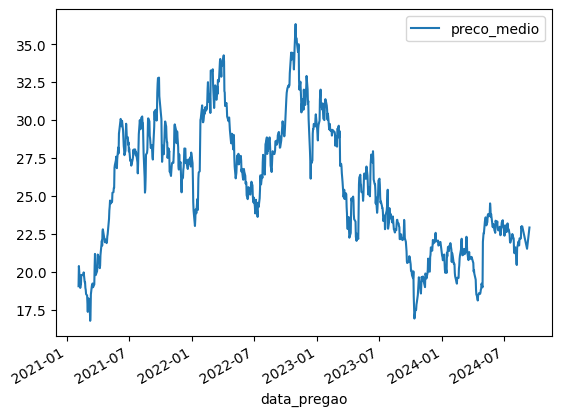

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('./dataset/dados_pregao_intb3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_medio']]
print(df.head())
df.plot()
pyplot.show

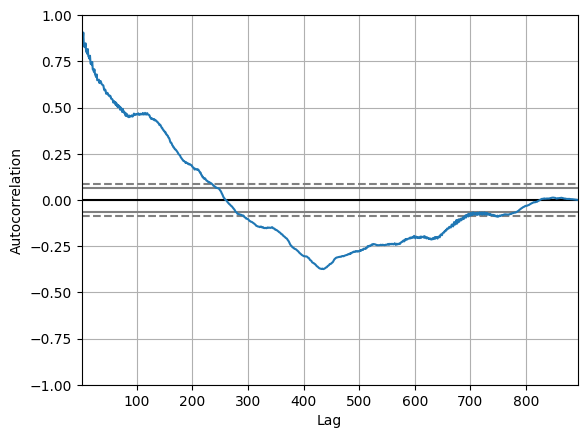

In [8]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [9]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [10]:
stepwise_fit = auto_arima(df['preco_medio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3381.845, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3822.822, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3589.917, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3426.525, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3820.822, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3381.174, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3420.628, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3423.586, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3378.440, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3408.020, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3361.158, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3255.470, Time=0.50 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3260.403, Time=0.32 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=3260.373, Time=1.46 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

predicted=19.766782, expected=19.370000
predicted=19.348591, expected=19.270000
predicted=19.366186, expected=18.990000
predicted=19.167416, expected=19.890000
predicted=19.527125, expected=19.800000
predicted=19.557311, expected=19.560000
predicted=19.487184, expected=19.880000
predicted=19.863712, expected=20.110000
predicted=19.814446, expected=20.870000
predicted=20.086079, expected=20.690000
predicted=20.359702, expected=20.030000
predicted=20.387346, expected=20.010000
predicted=20.399283, expected=20.970000
predicted=20.311440, expected=21.120000
predicted=20.424433, expected=21.610000
predicted=21.004985, expected=21.570000
predicted=21.576020, expected=21.390000
predicted=21.295741, expected=21.800000
predicted=21.393030, expected=22.100000
predicted=21.555938, expected=21.910000
predicted=21.858776, expected=21.880000
predicted=21.979356, expected=21.950000
predicted=21.900606, expected=22.150000
predicted=21.803698, expected=22.420000
predicted=22.089128, expected=22.570000


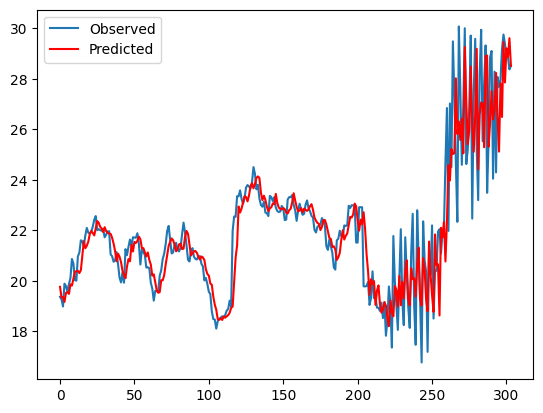

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,1,5))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()
